# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

# Read and Understand Data

In [2]:
#Reading the csv file salary.csv
df = pd.read_csv('Salary Data.csv')
insured=df.copy()

In [3]:
# inspect data, print top 5
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# bottom 5 rows:
insured.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [6]:
insured.shape

(375, 6)

In [7]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [8]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [9]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


Rows     :  375
Columns  :  6


In [10]:
insured.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [11]:
insured.isnull().sum().values.sum()

12

In [12]:
# insured[insured['Gender'] == '']

In [13]:
insured = insured.dropna()

In [14]:
insured.shape

(373, 6)

In [15]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))


Values : 
 [[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0 90000.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0 65000.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0 150000.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0 40000.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0 90000.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0 150000.0]]

Features : 
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [16]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [17]:
insured.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [18]:
#changing object dtype to category  to save memory
insured['Gender']=insured['Gender'].astype("category")
insured['Education Level']=insured['Education Level'].astype("category")
insured['Job Title']=insured['Job Title'].astype("category")


In [19]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 18.8 KB


In [20]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [21]:
insured.select_dtypes(['category'])

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
370,Female,Bachelor's,Senior Marketing Analyst
371,Male,Master's,Director of Operations
372,Female,Bachelor's,Junior Project Manager
373,Male,Bachelor's,Senior Operations Coordinator


In [22]:
insured.select_dtypes(['category']).columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [23]:
insured.select_dtypes(['float'])

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [24]:
insured.select_dtypes(['float']).columns

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [25]:
# get counts of unique observations for each category variable
list_col=  insured[insured.select_dtypes(['category']).columns]
list_col

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
370,Female,Bachelor's,Senior Marketing Analyst
371,Male,Master's,Director of Operations
372,Female,Bachelor's,Junior Project Manager
373,Male,Bachelor's,Senior Operations Coordinator


In [26]:
# get counts of unique observations for each category variable
list_col=  insured[insured.select_dtypes(['float']).columns]
list_col

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [27]:
# Count data

In [28]:
insured['Gender'].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [29]:
insured['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [30]:
dict(insured['Education Level'].value_counts())

{"Bachelor's": 224, "Master's": 98, 'PhD': 51}

In [31]:
insured['Job Title'].value_counts()

Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64

In [32]:
list_col = insured.select_dtypes(['category']).columns
list_col
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

Male      194
Female    179
Name: Gender, dtype: int64
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64


## Bivariate & Multivariate Analysis

In [33]:
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [34]:
corr_insured = insured[['Age','Years of Experience','Salary']]

In [35]:
corr_insured.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


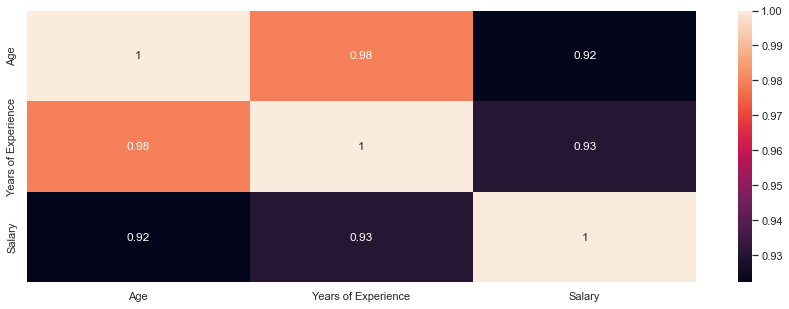

In [36]:
# heatmap plotting using correlation plot

plt.figure(figsize=(15,5))  #  defined figure size
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 360x360 with 0 Axes>

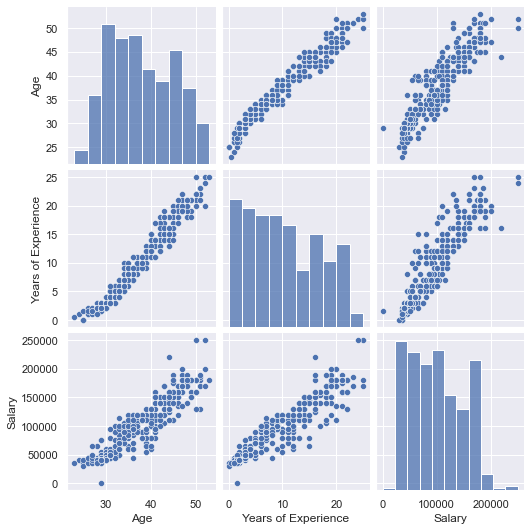

In [37]:
# pairplot: when we use histogram and scatter plot together

plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

<AxesSubplot:xlabel='Education Level', ylabel='count'>

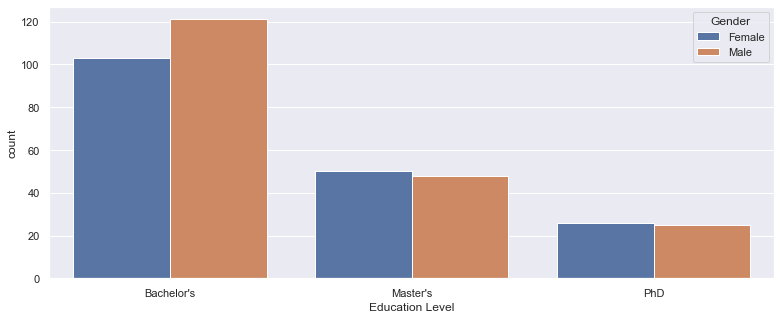

In [38]:
#Gender count plot. hue means in what basis will you categorize the data.

plt.figure(figsize=(13,5))
sns.countplot(x='Education Level',hue='Gender',data=insured)

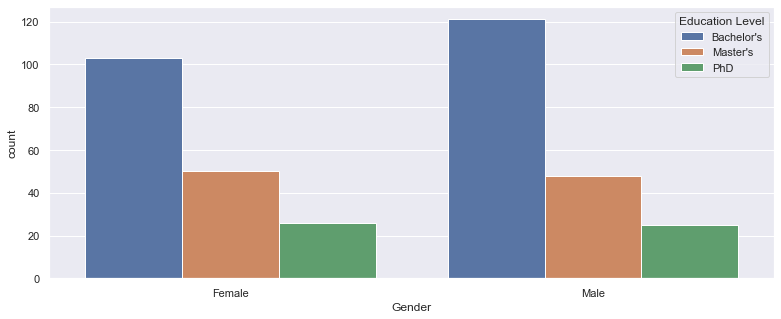

In [39]:
#Sex vs Education Level

plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured)

In [40]:
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [41]:
# GROUP BY

In [42]:
# Finding out average salary of male and female. The Gender and Salary are column name of dataset. 

insured.groupby(insured['Gender']).Salary.mean()    #GROUP BY BY Gender

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

In [43]:
insured.groupby(insured['Gender']).Salary.sum()    #GROUP BY BY Gender

Gender
Female    17365000.0
Male      20150350.0
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Gender'>

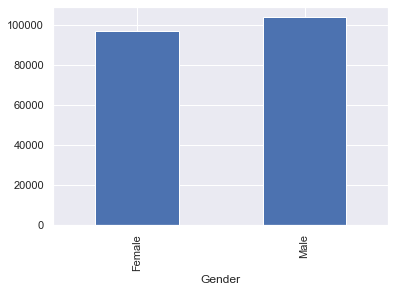

In [44]:
insured.groupby(insured['Gender']).Salary.mean().plot.bar()    #GROUP BY BY Gender

In [45]:
insured.groupby(insured['Education Level']).Salary.mean()     #GROUP BY BY Education Level

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

In [46]:
#rename
# inplace=True means change the original value.

insured.rename(columns = {'Years of Experience':'Years_of_Experience','Education Level':'Education_Level'}, inplace = True)

In [47]:
insured

,Age,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [48]:
insured.groupby(insured['Education_Level']).Years_of_Experience.mean()      #GROUP BY BY Education Level

Education_Level
Bachelor's     6.966518
Master's      13.397959
PhD           17.019608
Name: Years_of_Experience, dtype: float64

In [49]:
plot_data = dict(insured.groupby(insured['Education_Level']).Salary.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
print(plot_data)

["Bachelor's", "Master's", 'PhD']
[74756.02678571429, 129795.91836734694, 157843.13725490196]
{"Bachelor's": 74756.02678571429, "Master's": 129795.91836734694, 'PhD': 157843.13725490196}


<AxesSubplot:xlabel='Education_Level'>

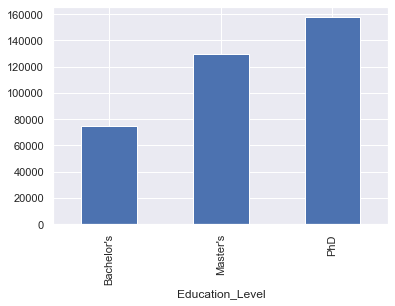

In [50]:
insured.groupby(insured['Education_Level']).Salary.mean().plot.bar()

<AxesSubplot:xlabel='Education_Level'>

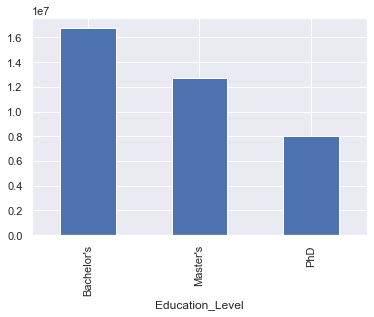

In [51]:
insured.groupby(insured['Education_Level']).Salary.sum().plot.bar()

[Text(0.5, 1.0, 'Gender Vs Salary')]

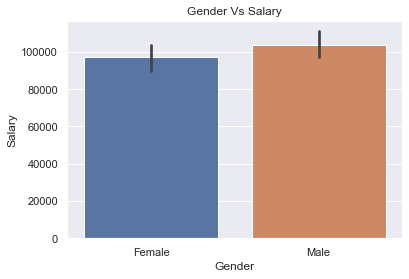

In [52]:
_#Plot of Gender and Salary
sns.barplot(x=insured.Gender,y=insured.Salary).set(title='Gender Vs Salary')

[Text(0.5, 1.0, 'Education Level Vs Salary')]

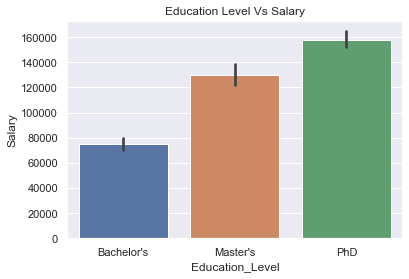

In [53]:
sns.barplot(x=insured['Education_Level'],y=insured['Salary']).set(title='Education Level Vs Salary')